# Import the modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Read the Dataset

In [2]:
A = pd.read_csv("D:/GitHub_Projects/Loan_Prediction_Analysis/Loan Prediction Dataset.csv")

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
A.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the Dataset

In [6]:
#finding the null values in Dataset
A.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 Creating the "replacer" function for Missing Data Treatment in which null values of numerical data will be replaced by mean of numerical data and categorical data null values will be replaced by mode of categorical data present in the dataset.


In [7]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [8]:
replacer(A)

In [9]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

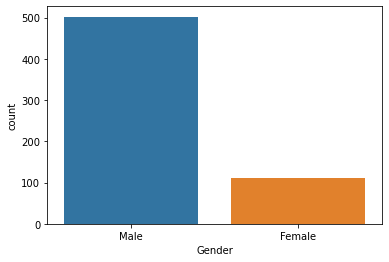

In [10]:
#Categorical Attributes Visualization
sb.countplot(A["Gender"])

<AxesSubplot:xlabel='Married', ylabel='count'>

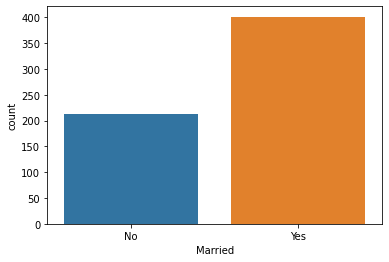

In [11]:
sb.countplot(A["Married"])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

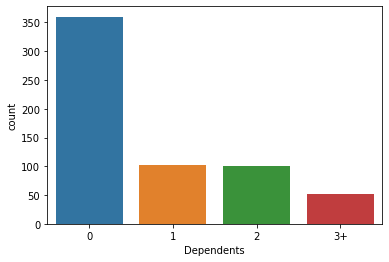

In [12]:
sb.countplot(A["Dependents"])

<AxesSubplot:xlabel='Education', ylabel='count'>

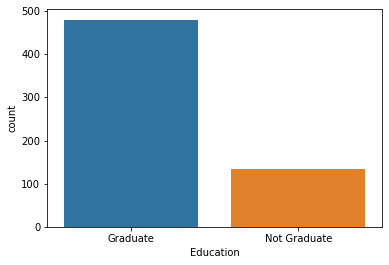

In [13]:
sb.countplot(A["Education"])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

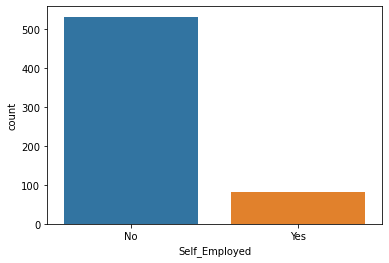

In [14]:
sb.countplot(A["Self_Employed"])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

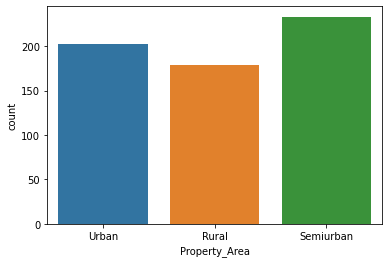

In [15]:
sb.countplot(A["Property_Area"])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

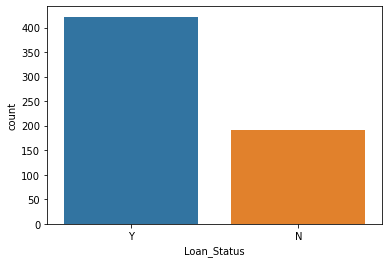

In [16]:
sb.countplot(A["Loan_Status"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

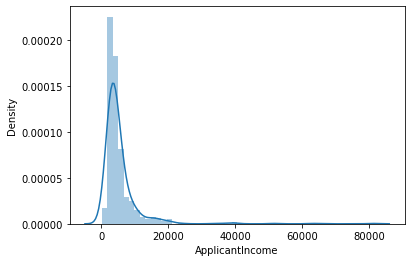

In [17]:
#Numerical Data Attributes Visualization
sb.distplot(A["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

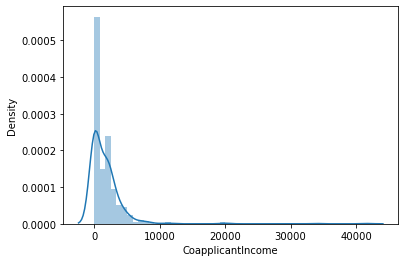

In [18]:
sb.distplot(A["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

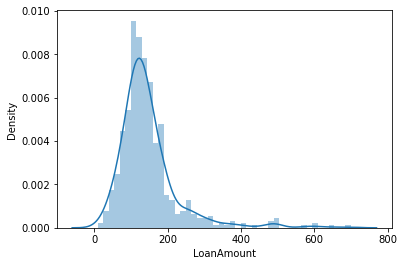

In [19]:
sb.distplot(A["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

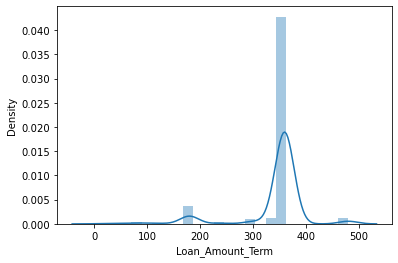

In [20]:
sb.distplot(A["Loan_Amount_Term"])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

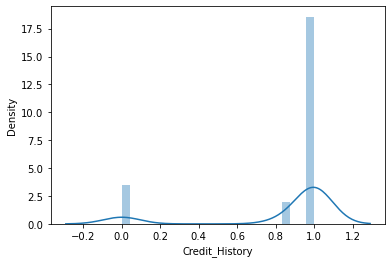

In [21]:
sb.distplot(A["Credit_History"])

# Creating new Attributes

In [22]:
#total income

A["Total Income"] = A["ApplicantIncome"] + A["CoapplicantIncome"]
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Log Transformation

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

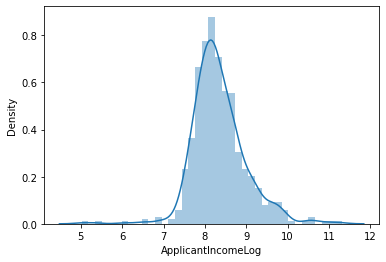

In [23]:
#apply Log Transformation to attributes
A["ApplicantIncomeLog"] = np.log(A["ApplicantIncome"]+1)
sb.distplot(A["ApplicantIncomeLog"])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

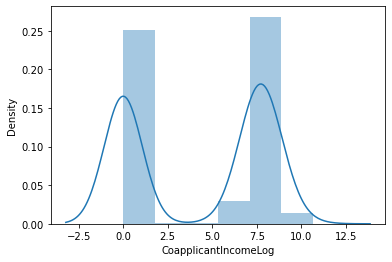

In [24]:
A["CoapplicantIncomeLog"] = np.log(A["CoapplicantIncome"]+1)
sb.distplot(A["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

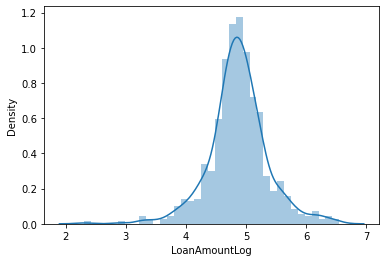

In [25]:
A["LoanAmountLog"] = np.log(A["LoanAmount"]+1)
sb.distplot(A["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

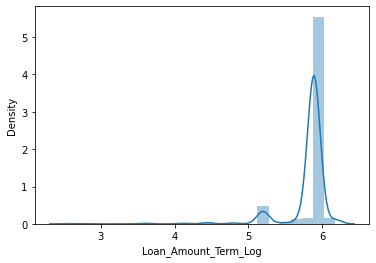

In [26]:
A["Loan_Amount_Term_Log"] = np.log(A["Loan_Amount_Term"]+1)
sb.distplot(A["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total Income_Log', ylabel='Density'>

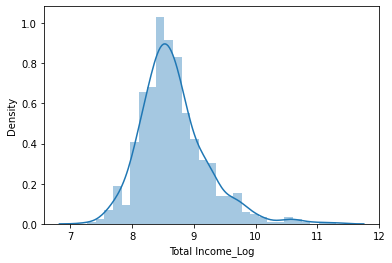

In [27]:
A["Total Income_Log"] = np.log(A["Total Income"]+1)
sb.distplot(A["Total Income_Log"])

# Co-Relation Matrix

<AxesSubplot:>

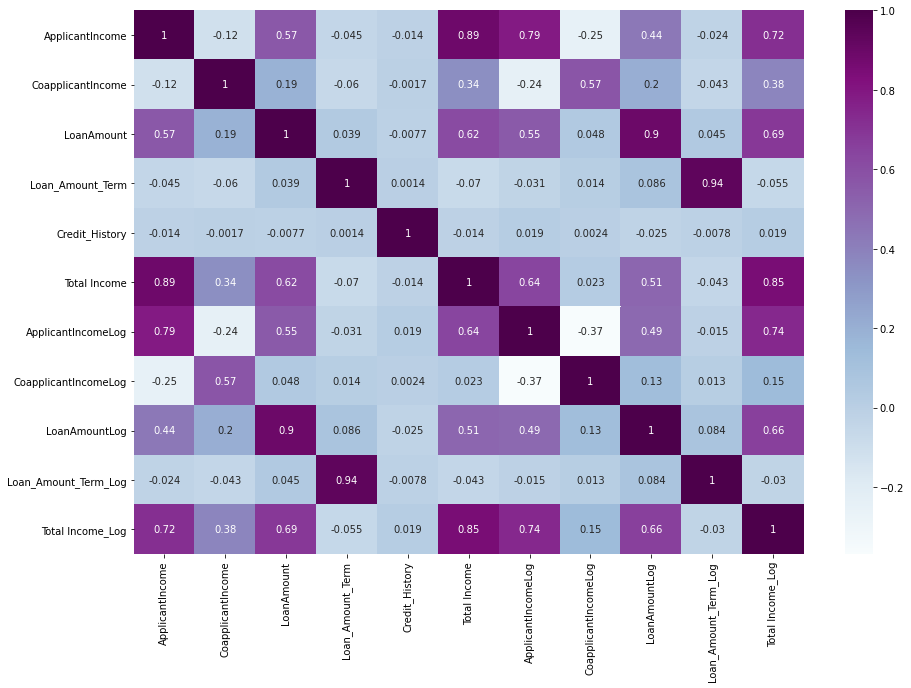

In [28]:
corr = A.corr()
plt.figure(figsize=(15,10))
sb.heatmap(corr,annot=True,cmap="BuPu")

In [29]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.993232,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [30]:
#Dropping the unnecessary columns from Dataset
cols = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Total Income","CoapplicantIncomeLog","Loan_ID"]
B = A.drop(columns=cols,axis=1)
B.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


# Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()

for col in cols:
    B[col] = le.fit_transform(B[col])

In [32]:
B.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


# Divide Data into Training and Testing Set

In [33]:
X = B.drop(columns=["Loan_Status"],axis=1)
Y = B["Loan_Status"]

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=0.25,random_state=42)

# Model Training

In [35]:
#classify function
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=0.25,random_state=42)
    model.fit(xtrain,ytrain)
    print("Accuracy is",model.score(xtest,ytest)*100)
    #cross validation is used fro better validation of model
    #eg;- cv=5 , train=4 , test=1
    score = cross_val_score(model,x,y, cv=5)
    print("Cross Validation is",np.mean(score)*100)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,Y)

Accuracy is 80.6941431670282
Cross Validation is 80.9462881514061


In [37]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,Y)

Accuracy is 71.8004338394794
Cross Validation is 71.82726909236305


In [38]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,Y)

Accuracy is 78.95878524945769
Cross Validation is 78.83113421298147


In [39]:
model=ExtraTreesClassifier()
classify(model,X,Y)

Accuracy is 76.78958785249458
Cross Validation is 77.20378515260562


# Hyperparameter Tuning

In [40]:
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
classify(model,X,Y)

Accuracy is 74.18655097613883
Cross Validation is 80.94762095161936


# Confusin Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [41]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [42]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(xtest)
cm=confusion_matrix(ytest,y_pred)
cm

array([[ 72,  74],
       [ 25, 290]], dtype=int64)

<AxesSubplot:>

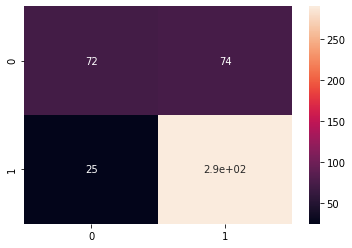

In [43]:
sb.heatmap(cm, annot=True)